# Bhattacharjya and Kephart (2014) Two-attribute example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## Two-attribute Example

Suppose $M = 2$ and that the DM’s marginal value functions are linear and normalized to between 0 and 1. As a reference, suppose that the DM’s trade-offs are accurately captured by weights $\omega_1 = 0.5$ and $\omega_2 = 0.5$.

Let the system believe that $\omega_1 \approx Uniform(u_{min},u_{max})$.

Alternative 1 $a_1$ leads to attributes $x_1 (a_1)=x_1^1$ and $x_2 (a_1)=x_2^1$. 

The value of alternative 1 is $v(a_1 )= \omega_1 x_1^1 +(1- \omega_1 ) x_2^1 = x_2^1 + (x_1^1 - x_2^1)\omega_1$

Alternative 2 $a_2$ leads to attributes $x_1 (a_2)=x_1^2$ and $x_2 (a_2)=x_2^2$.

The value of alternative 2 is $v(a_2 )= \omega_1 x_1^2 +(1- \omega_1 ) x_2^2 = x_2^2 + (x_1^2 - x_2^2)\omega_1$

If $a_1$ dominates $a_2$, $v(a_1) > v(a_2)$ and we have

$$
x_2^1 + (x_1^1 - x_2^1)\omega_1 > x_2^2 + (x_1^2 - x_2^2)\omega_1
$$

$$
x_2^1 - x_2^2 > (x_1^2 - x_2^2 - x_1^1 + x_2^1) \omega_1
$$

If $x_1^2 - x_2^2 - x_1^1 + x_2^1 > 0$

$$
\omega_1 < \frac{x_2^1 - x_2^2}{x_1^2 - x_2^2 - x_1^1 + x_2^1}
$$

and if $x_1^2 - x_2^2 - x_1^1 + x_2^1 < 0$

$$
\omega_1 < 1 - \frac{x_2^1 - x_2^2}{x_1^2 - x_2^2 - x_1^1 + x_2^1}
$$

Then, if alternative $a_1$ leads to attributes $x_1 (a_1)=x_1^1$ and $x_2 (a_1)=x_2^1$, the probability that alternative $a_1$ dominates $a_2$ is 

$$
\omega_i <
\begin{cases}
    1, & \text{if $x_1 < x_1^1$ and $x_2 < x_2^1$}\\
    \frac{x_2^1 - x_2^2}{x_1^2 - x_2^2 - x_1^1 + x_2^1}, & \text{ if $x_1^2 - x_2^2 - x_1^1 + x_2^1 > 0$}\\
    1 - \frac{x_2^1 - x_2^2}{x_1^2 - x_2^2 - x_1^1 + x_2^1}, & \text{ if $x_1^2 - x_2^2 - x_1^1 + x_2^1 < 0$}\\
    0, & \text{if $x_1 > x_1^1$ and $x_2 > x_2^1$}\\
\end{cases}
$$

If the distribution over $\omega_1$ is $U(u_{min}, u_{max})$, $\omega_1$ can take any value on $[0, 1]$ but the 
probablity $p_{a_1 a_2}$, i.e., the probability that $a_1$ dominates $a_2$, is constrained by $U(u_{min}, u_{max})$.

If $U(u_{min} = 0$ and $U(u_{max} = 1$, $p_{a_1 a_2} = \omega_1$. However, the general case for any $[u_{min}, u_{max}]$ is

$$
F(x) <
\begin{cases}
    0, & \text{if $x < u_{min}$}\\
    \frac{x - u_{min}}{u_{max} - u_{min}}, & \text{if $u_{min} \leq x \leq u_{max}$}\\
    1, & \text{if $x > u_{max}$}\\
\end{cases}
$$

For any quantile $x$, the inverse function is given by

$$
p = \frac{x - u_{min}}{u_{max} - u_{min}}
$$

and so for any $\omega_1$, the inverse function is given by

$$
p = \frac{\omega_1 - u_{min}}{u_{max} - u_{min}}
$$

In [2]:
def prob_dom (x11, x12, n_steps, probLB, probUB):
    """
    Function to calculate probable dominance for the two-attribute example from Bhattacharjya and Kephart (2014)
    
    Parameters
    __________
    x11: x-coordinate for alternative 1 (attribute x1)
    x12: y-coordinate for alternative 1 (attribute x2)
    n_steps: number of steps for x1 and x2 for alternative 2
    probLB: lower bound for uniform distribution
    probUB: upper bound for uniform distribution
    
    Returns
    _______
    None
    """
    
    n_min = 1 / n_steps / 2
    n_max = 1 - n_min
    
    x21 = np.linspace(n_min, n_max, n_steps)
    x22 = np.linspace(n_min, n_max, n_steps)

    p_x1x2 = []

    for j in reversed(x22):
        p_x1 = []
        for i in x21:
            x_num = x12 - j
            x_denom = i - j - x11 + x12
            if x_denom > 0:
                prob = ss.uniform.cdf(x = ((x_num) / (x_denom)), loc = probLB, scale = probUB - probLB)
                p_x1.append(prob)
            elif x_denom < 0:
                prob = 1 - ss.uniform.cdf(x = ((x_num) / (x_denom)), loc = probLB, scale = probUB - probLB)
                p_x1.append(prob)
            elif x_denom == 0:
                if x_num > 0:
                    p_x1.append(1)
                elif x_num < 0:
                    p_x1.append(0)
        p_x1x2.append(p_x1)

    # getting the original colormap using cm.get_cmap() function
    orig_map = plt.cm.get_cmap('bwr')

    # reversing the original colormap using reversed() function
    reversed_map = orig_map.reversed()

    plt.figure(figsize = (12, 7))

    plt.xlabel('Attribute $x_1$')
    plt.ylabel('Attribute $x_2$')

    # Add lines
    x1 = [0, 1]
    y1 = [x12, x12]
    plt.plot(x1, y1, "-", color = "black", linewidth = 1, alpha = 0.3)

    x2 = [x11, x11]
    y2 = [0., 1.]
    plt.plot(x2, y2, "-", color = "black", linewidth = 1, alpha = 0.3)

    diag = x11 + x12
    x = [0, diag]
    y = [diag, 0]
    plt.plot(x, y, "--", color = "black", linewidth = 1)

    plt.scatter(x11, x12, s = 100, facecolors = ['black'], edgecolors = ['black'], norm = False)

    plt.imshow(p_x1x2, cmap = reversed_map, extent = [0, 1, 0, 1])
    plt.show()


What would you like the value for x₁(a₁) to be? 0.2

What would you like the value for x₂(a₁) to be? 0.6

How many steps would you like to use? 100

What would you like the min value for u to be? 0

What would you like the max value for u to be? 1



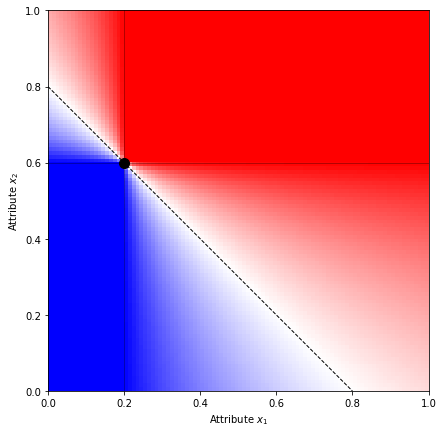

In [3]:
def prob_dom_example ():
    """
    Function to input different values for x1_a1, x2_a1, n_steps, u_min, and u_max 
    for the two-attribute example with a uniform distribution
    
    Parameters
    __________
    None
    
    Returns
    _______
    None
    """
    
    # Distribution over w_1 is U(u_min, u_max). w1 can take any value on [0, 1] but the 
    # probablity p(w1) is constrained by U(u_min, u_max)

    x1_a1 = float(input('\nWhat would you like the value for x\u2081(a\u2081) to be? '))
    x2_a1 = float(input('\nWhat would you like the value for x\u2082(a\u2081) to be? '))
    n_steps = int(input('\nHow many steps would you like to use? '))
    u_min = float(input('\nWhat would you like the min value for u to be? '))
    u_max = float(input('\nWhat would you like the max value for u to be? '))
    print()

    prob_dom(x1_a1, x2_a1, n_steps, u_min, u_max)
        
prob_dom_example()